<a href="https://colab.research.google.com/github/shristi-muskan510/ML/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# IMAGES LINK:
# Butterfly - https://drive.google.com/file/d/1q7aRdHRI32gOU3WDg0aQDz0a9thhyn46/view?usp=drive_link
# Tree - https://drive.google.com/file/d/1pVORQbowjD0rf6bBDkIUECIfemh3SSia/view?usp=drive_link
# Birds - https://drive.google.com/file/d/1JTiS9y2RfxVh3oiv5Xmt3PrqcrDCi-8u/view?usp=drive_link
# Landscape - https://drive.google.com/file/d/1IuKuEF6NP3ceThA3P7pqze0mI58wq2Ti/view?usp=drive_link

In [8]:
#Loading the image
butterfly = cv2.imread('butterfly.jpeg')

#cropping the image
cropped_butterfly = butterfly[20:85, 50:145]

#Applying transformations(Resize)
butterfly_resize = cv2.resize(cropped_butterfly, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)


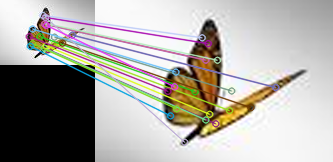

True

In [9]:
#Create a SIFT Detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
key_image, des_image = sift.detectAndCompute(cropped_butterfly, None)
key_transformed, des_transformed = sift.detectAndCompute(butterfly_resize, None)

# Create a Brute-Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors between the original and transformed image
matches = bf.match(des_image, des_transformed)

# Sort the matches based on their distances (best matches first)
matches_s = sorted(matches, key = lambda x : x.distance)

# Draw the top 80 matches between the two images
matches_draw = cv2.drawMatches(cropped_butterfly, key_image, butterfly_resize, key_transformed, matches_s[:80], None, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS )

#Display Image
cv2_imshow(matches_draw)
cv2.waitKey(0)

#Saving image
cv2.imwrite('butterfly_matches.png', matches_draw)

In [37]:
#Loading the image
tree = cv2.imread('tree.jpeg')

height, width = tree.shape[:2]

#Get the rotation matrix
matrix = cv2.getRotationMatrix2D((width/2, height/2), 35, 1)

#Applying transformations(Rotation)
tree_rotated = cv2.warpAffine(tree, matrix, (width, height))

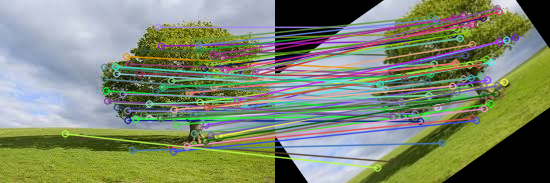

True

In [38]:
sift = cv2.SIFT_create()

key_image, des_image = sift.detectAndCompute(tree, None)
key_transformed, des_transformed = sift.detectAndCompute(tree_rotated, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des_image, des_transformed)

matches_s = sorted(matches, key = lambda x : x.distance)

matches_draw = cv2.drawMatches(tree, key_image, tree_rotated, key_transformed, matches_s[:80], None, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS )

cv2_imshow(matches_draw)
cv2.waitKey(0)

cv2.imwrite('/content/tree_matches.png', matches_draw)

In [12]:
#Loading the image
birds = cv2.imread('birds.jpeg')

birds_gray = cv2.cvtColor(birds, cv2.COLOR_BGR2GRAY)

#Get the rranslation matrix
matrix = np.float32([[1,0,50],[0,1,50]])

#Applying transformations(Translation)
birds_translated = cv2.warpAffine(birds_gray, matrix, (birds_gray.shape[1]+50,birds_gray.shape[0]+50))

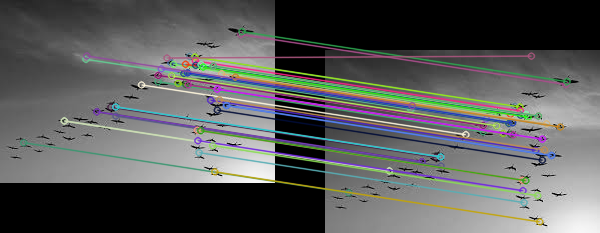

True

In [13]:
sift = cv2.SIFT_create()

key_image, des_image = sift.detectAndCompute(birds_gray, None)
key_transformed, des_transformed = sift.detectAndCompute(birds_translated, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des_image, des_transformed)

matches_s = sorted(matches, key = lambda x : x.distance)

matches_draw = cv2.drawMatches(birds_gray, key_image, birds_translated, key_transformed, matches_s[:80], None, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS )

cv2_imshow(matches_draw)
cv2.waitKey(0)

cv2.imwrite('/content/birds_matches.png', matches_draw)

In [14]:
#Loading the image
landscape = cv2.imread('landscape.jpeg')

h, w = landscape.shape[:2]

#Get the sheared Matrix
matrix = np.float32([[1,0.3,0],[0,1,0]])

# Calculate the new bounding dimensions
new_w = int(w + h * 0.3)

#Applying transformations(Shearing)
landscape_sheared = cv2.warpAffine(landscape, matrix, (new_w,h))

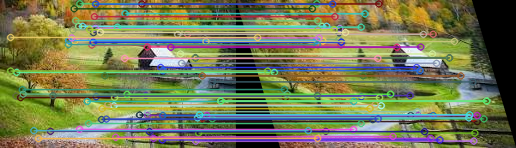

True

In [15]:
sift = cv2.SIFT_create()

key_image, des_image = sift.detectAndCompute(landscape, None)
key_transformed, des_transformed = sift.detectAndCompute(landscape_sheared, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des_image, des_transformed)

matches_s = sorted(matches, key = lambda x : x.distance)

matches_draw = cv2.drawMatches(landscape, key_image, landscape_sheared, key_transformed, matches_s[:80], None, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS )

cv2_imshow(matches_draw)
cv2.waitKey(0)

cv2.imwrite('/content/landscape_matches.png', matches_draw)